In [6]:
!pip install python-dotenv pandas seaborn matplotlib scikit-learn plotly


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
df = pd.read_csv('preprocessed_data.csv')

In [16]:
df.head(10)

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,...,Body Type_Utility Truck,Body Type_Van,Body Type_Wagon,Make Encoded,Model Encoded,Color Encoded,Year zscore scaled,Mileage zscore scaled,Price zscore scaled,Cylinders zscore scaled
0,toyota,camry,2016,47819.0,156500,Sedan,4,Automatic Transmission,Gasoline,Black,...,0.0,0.0,0.0,111815.739082,59573.661538,295369.325024,0.263740,0.015991,-0.419182,-1.155725
1,kia,sorento,2013,61250.0,169543,SUV,4,Automatic Transmission,Gasoline,Grey,...,0.0,0.0,0.0,44691.069565,39255.111111,259363.792655,-0.254345,0.171863,-0.390664,-1.155725
2,mini,cooper,2023,31861.0,221583,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey,...,0.0,0.0,0.0,75449.916667,72200.627907,259363.792655,1.472606,0.793774,-0.453067,-1.155725
3,nissan,altima,2016,110322.0,69754,Sedan,4,Automatic Transmission,Gasoline,Red,...,0.0,0.0,0.0,95783.971892,46364.504505,276426.754331,0.263740,-1.020677,-0.286467,-1.155725
4,toyota,land-cruiser-76-series,2020,139994.0,71399,Pick Up Truck,4,Manual Transmission,Gasoline,White,...,0.0,0.0,0.0,111815.739082,137098.800000,190510.761848,0.954521,-1.001018,-0.223462,-1.155725
5,chevrolet,silverado,2010,43194.0,233934,Pick Up Truck,8,Automatic Transmission,Gasoline,Brown,...,0.0,0.0,0.0,91526.957096,105152.600000,88297.272340,-0.772431,0.941376,-0.429003,0.929574
6,chevrolet,camaro,2024,94100.0,147140,Coupe,8,Automatic Transmission,Gasoline,Silver,...,0.0,0.0,0.0,91526.957096,93023.229167,148198.603926,1.645302,-0.095866,-0.320912,0.929574
7,cadillac,srx,2024,30047.0,51876,SUV,6,Automatic Transmission,Gasoline,Gold,...,0.0,0.0,0.0,212005.605442,38833.000000,185866.512605,1.645302,-1.234330,-0.456919,-0.113075
8,mercedes-benz,g-class,2009,603574.0,32956,SUV,8,Automatic Transmission,Gasoline,Black,...,0.0,0.0,0.0,372082.499327,900353.922179,295369.325024,-0.945126,-1.460436,0.760880,0.929574
9,infiniti,q50,2013,49531.0,11954,Sedan,4,Automatic Transmission,Gasoline,White,...,0.0,0.0,0.0,76717.306122,74740.647059,190510.761848,-0.254345,-1.711423,-0.415547,-1.155725


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Make                            10000 non-null  object 
 1   Model                           10000 non-null  object 
 2   Year                            10000 non-null  int64  
 3   Price                           10000 non-null  float64
 4   Mileage                         10000 non-null  int64  
 5   Body Type                       10000 non-null  object 
 6   Cylinders                       10000 non-null  int64  
 7   Transmission                    10000 non-null  object 
 8   Fuel Type                       10000 non-null  object 
 9   Color                           10000 non-null  object 
 10  Car Age                         10000 non-null  int64  
 11  Mileage Per Year                10000 non-null  float64
 12  Log Price                       1

### Summary Statistics for numerical features

In [18]:
numerical_features = ['Price', 'Mileage', 'Year', 'Cylinders', 'Car Age', 'Mileage Per Year']
numerical_summary = df[numerical_features].describe()
print(numerical_summary)

              Price        Mileage          Year     Cylinders       Car Age  \
count  1.000000e+04   10000.000000  10000.000000  10000.000000  10000.000000   
mean   2.452345e+05  155161.871700   2014.472800      6.216900     10.527200   
std    4.709773e+05   83681.858983      5.790839      1.918286      5.790839   
min    7.183000e+03   10006.000000   2005.000000      3.000000      1.000000   
25%    5.035250e+04   82904.000000   2009.000000      4.000000      6.000000   
50%    1.027660e+05  154370.500000   2014.000000      6.000000     11.000000   
75%    2.312480e+05  227551.250000   2019.000000      8.000000     16.000000   
max    1.468698e+07  299996.000000   2024.000000     12.000000     20.000000   

       Mileage Per Year  
count      10000.000000  
mean       27820.898799  
std        41246.535840  
min          500.300000  
25%         7927.552083  
50%        14732.922794  
75%        27824.100000  
max       299996.000000  


### price distribution

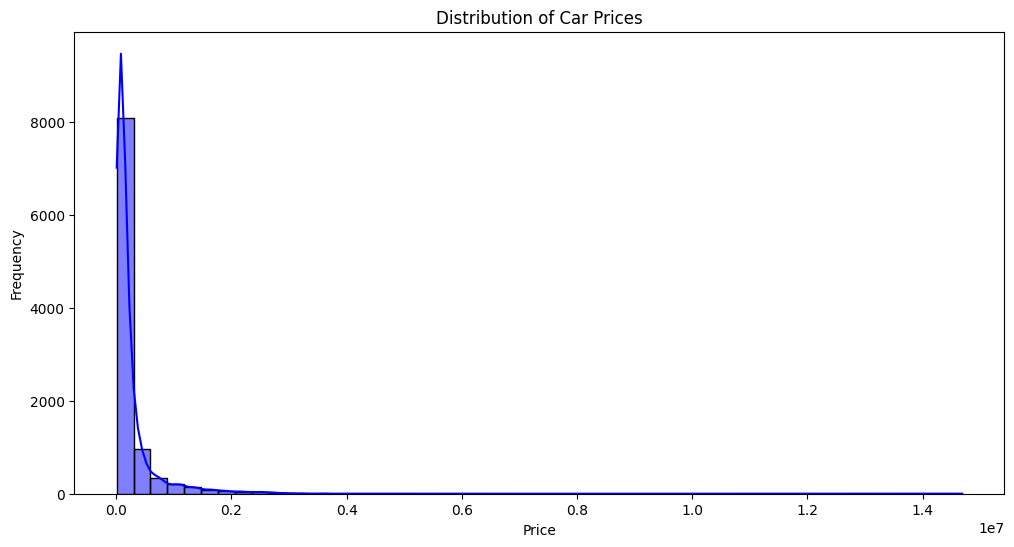

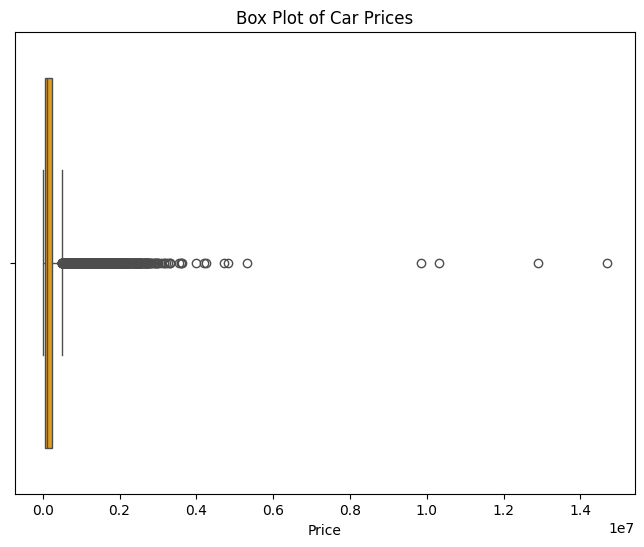

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Price
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot for Price
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price'], color='orange')
plt.title('Box Plot of Car Prices')
plt.xlabel('Price')
plt.show()

The median price is 102,766 AED, meaning that most cars are priced lower than the mean, indicating a right-skewed distribution. Also the histogram show a right-skewed distribution, with most cars concentrated in the lower price range and a long tail of high-priced cars. this is why we had to transform price to log price in data preprocessing step.

The minimum price is 7,183 AED, while the maximum reaches 14,686,980 AED, suggesting that luxury and high-end cars significantly impact the dataset (outliers). the boxplot above show those outliers and how they are distibuted

### Year Distribution

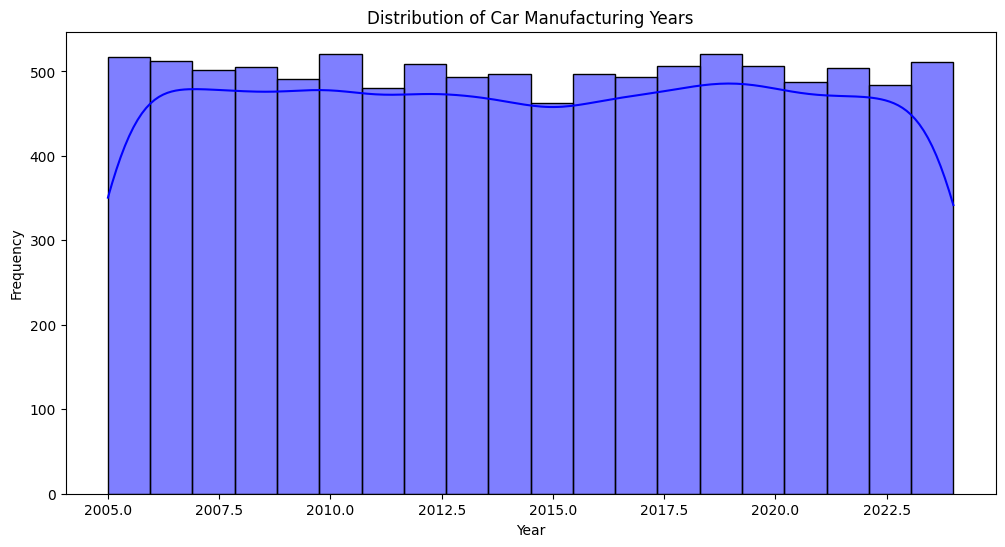

In [27]:
# Histogram for Year
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=20, kde=True, color='blue')
plt.title('Distribution of Car Manufacturing Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

the dataset contains cars manufactured between 2005 and 2024. The histogram will shows a symmetric distribution, the average model year being 2014, meaning most cars in this dataset are around 10 years old. 

### Mileage Distribution

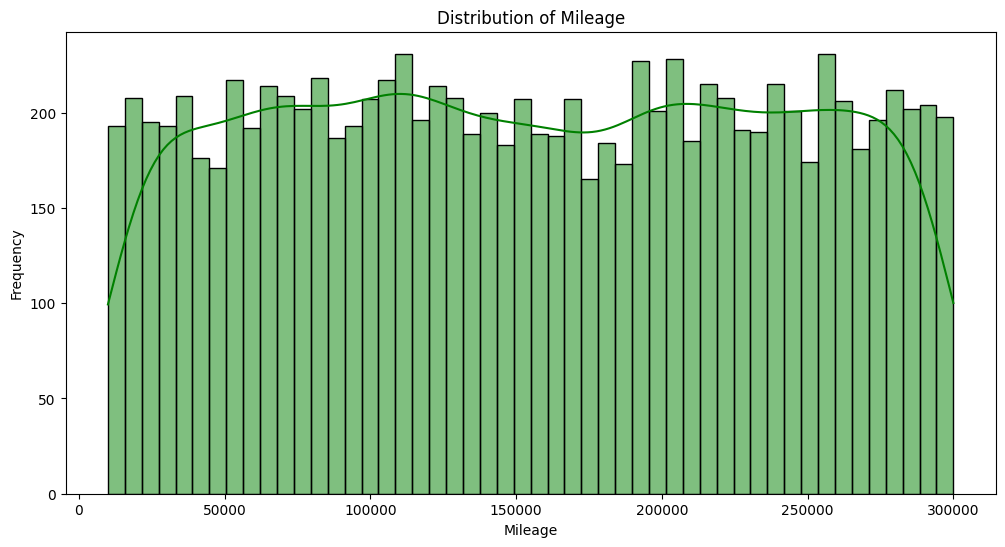

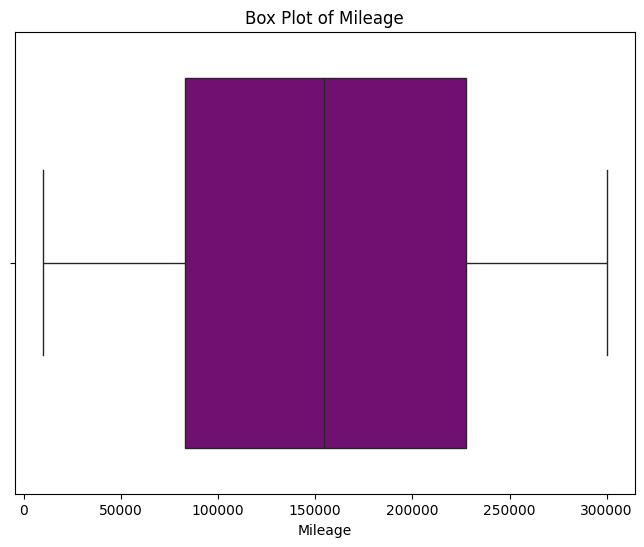

In [28]:
# Histogram for Mileage
plt.figure(figsize=(12, 6))
sns.histplot(df['Mileage'], bins=50, kde=True, color='green')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

# Box Plot for Mileage
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Mileage'], color='purple')
plt.title('Box Plot of Mileage')
plt.xlabel('Mileage')
plt.show()

The minimum mileage is 10,006 km, while the maximum is 299,996 km, showing a broad spectrum of used car conditions.The median mileage (154,370 km) is very close to the mean, suggesting a relatively symmetric distribution. The box plot indicate that there are no extreme outliers in the mileage data.

### Mileage Per Year Distribution

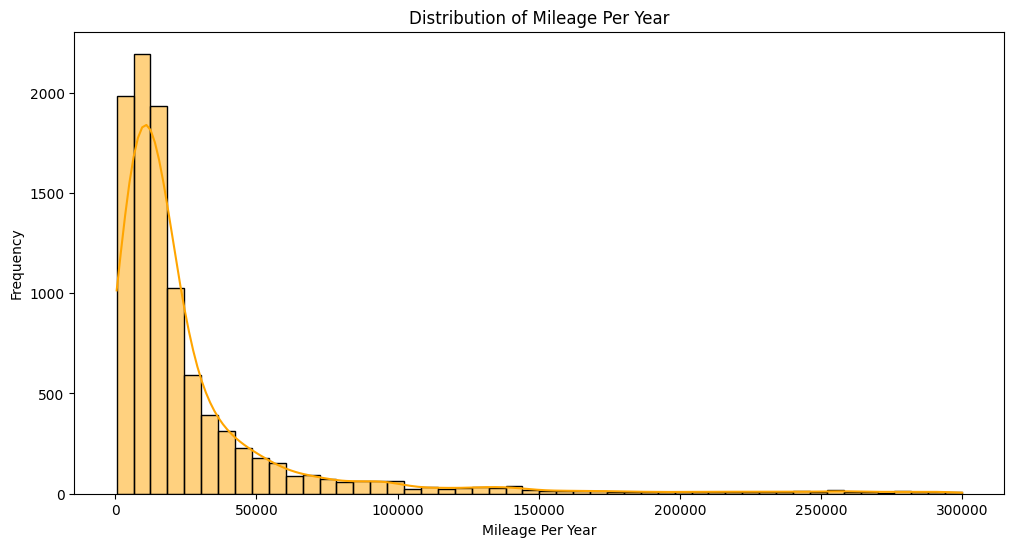

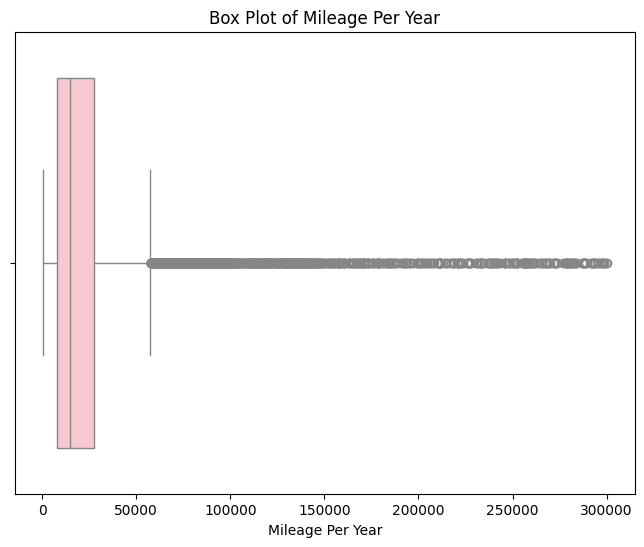

In [32]:
# Histogram for Mileage Per Year
plt.figure(figsize=(12, 6))
sns.histplot(df['Mileage Per Year'], bins=50, kde=True, color='orange')
plt.title('Distribution of Mileage Per Year')
plt.xlabel('Mileage Per Year')
plt.ylabel('Frequency')
plt.show()

# Box Plot for Mileage Per Year
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Mileage Per Year'], color='pink')
plt.title('Box Plot of Mileage Per Year')
plt.xlabel('Mileage Per Year')
plt.show()

The average mileage per year is 27,820 km, but it has a very high standard deviation (41,246 km). The minimum mileage per year is 500 km, indicating that there are rarely used cars in the used market, which customers would most like to purchase if their prices are within their budget. Also histogram shows a right-skewed distribution, with most cars having low annual mileage but a few outliers with extremely high annual mileage. The maximum of 299,996 km indicates that some cars have been driven extensively. There are many outliers on the higher end, indicating that some vehicles have very high annual mileage compared to the majority. The majority of data points fall within a reasonable range, but extreme values beyond 100,000 miles per year exist.

Some values exceeding 200,000+ miles per year seem unrealistic for regular consumer vehicles.

### Cylinders Disribution

C:\Users\dinit\AppData\Local\Temp\ipykernel_42896\27333328.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cylinders', data=df, palette='viridis')


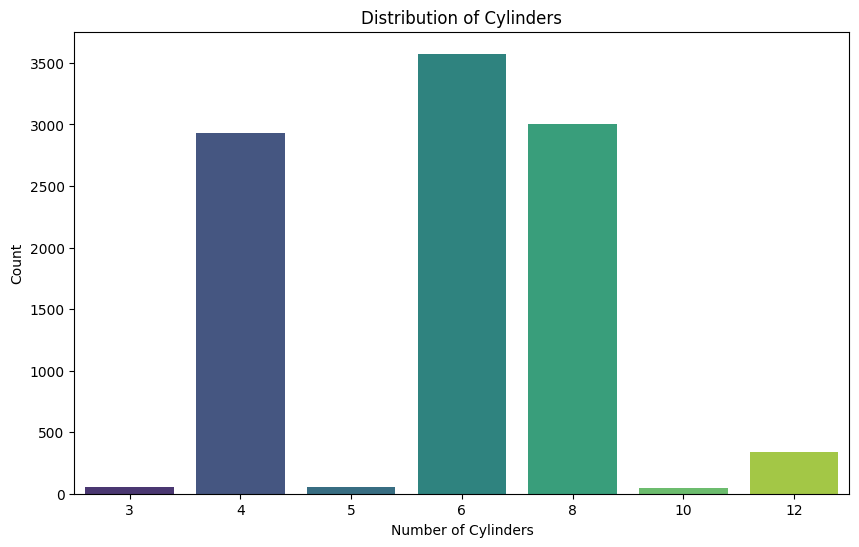

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cylinders', data=df, palette='viridis')
plt.title('Distribution of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.show()

The number of cylinders ranges from 3 to 12, with the most common values being 4, 6, and 8. The median value is 6 cylinders, which suggests that mid-range engines dominate the used car market.

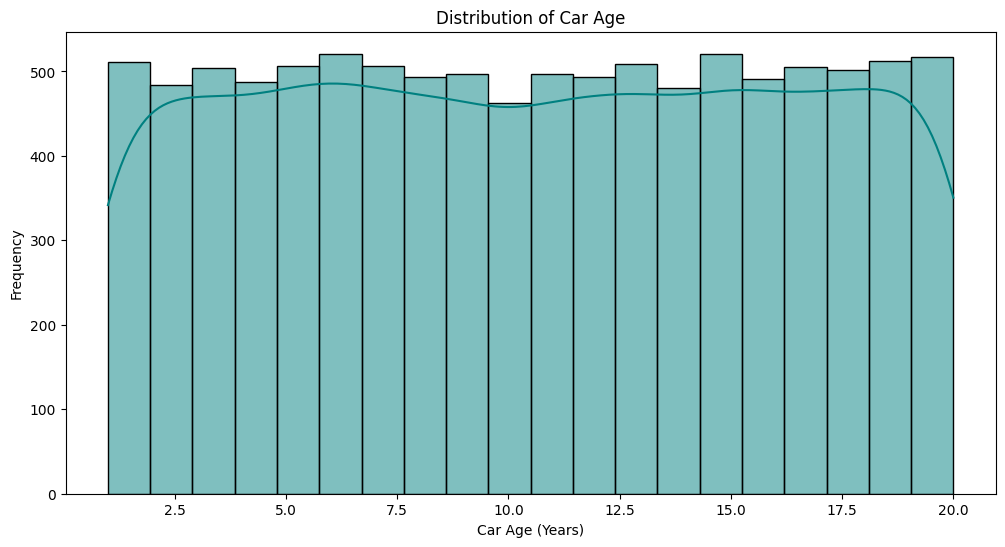

### Summary Statistics for categorical features

In [24]:
categorical_features = ['Body Type', 'Make', 'Model', 'Transmission', 'Fuel Type', 'Color']

for feature in categorical_features:
    categorical_summary = df[feature].value_counts()
    print(categorical_summary)
    print("------------------------------------------------------")

Body Type
SUV                     4607
Sedan                   2790
Coupe                    837
Pick Up Truck            432
Hatchback                334
Sports Car               270
Van                      143
Hard Top Convertible     139
Crossover                136
Soft Top Convertible     120
Other                    114
Wagon                     44
Utility Truck             34
Name: count, dtype: int64
------------------------------------------------------
Make
mercedes-benz    1486
nissan            925
toyota            893
bmw               698
ford              541
                 ... 
gac                 1
haval               1
baic                1
smart               1
morgan              1
Name: count, Length: 65, dtype: int64
------------------------------------------------------
Model
patrol               386
s-class              288
g-class              257
land-cruiser         208
range-rover-sport    198
                    ... 
centennial             1
aero-8     

In [ ]:
#Average Price car per year
